## Random Forest Model

## Prepare Datasets and show datasets

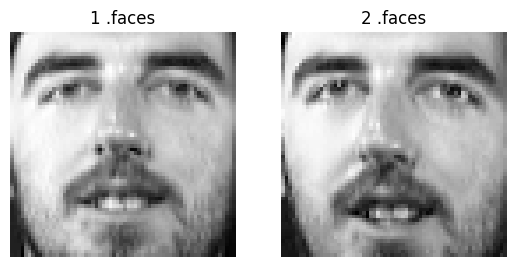

In [23]:
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt

oli = fetch_olivetti_faces()
"""
 The dataset has 2D dimension(64x64)  -> 1D (4096)
"""
plt.figure()
for i in range(2):
  plt.subplot(1,2,i+1)
  plt.title(f"{i+1} .faces")
  plt.imshow(oli.images[i+100], cmap = "gray")
  plt.axis("off")
plt.show()

## Train and Select Model

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = oli.data
y = oli.target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2, random_state = 42)

random_forest_cf = RandomForestClassifier(n_estimators=200 , random_state = 42)
random_forest_cf.fit(X_train,y_train) ## Training

RandomForestClassifier(n_estimators=200, random_state=42)

## Make Prediction and Other Calculations

In [36]:
from sklearn.metrics import accuracy_score

y_pred = random_forest_cf.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy:.2%}")

Accuracy: 92.50%


# Show the most suitable accuracy value
--> According to our features of the dataset

In [ ]:
## Before adjust the hyperparemeters
import matplotlib.pyplot as plt
accuracy_values = []
k_values = []     # --> k: n_estimators

for k in range(1,51):
  random_forest_cf = RandomForestClassifier(n_estimators = k)
  random_forest_cf.fit(X_train,y_train)
  y_pred = random_forest_cf.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  accuracy_values.append(accuracy)
  k_values.append(k)

## Show with matplotlib-1

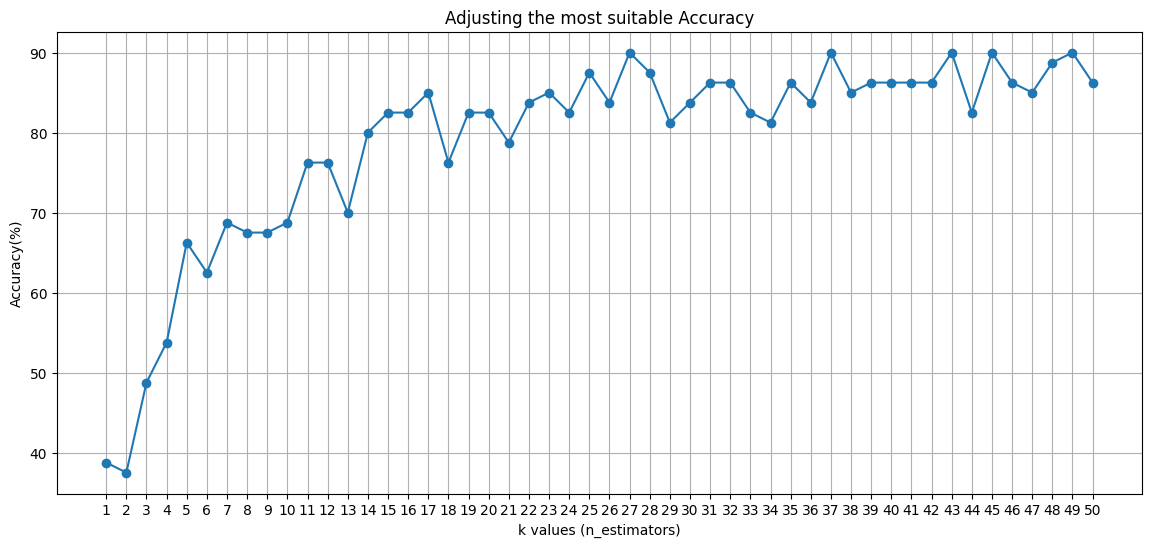

In [53]:
plt.figure(figsize=(14,6))
accuracy_show_percantages = [a * 100 for a in accuracy_values] # transform to percanteges accuracy

plt.plot(k_values,accuracy_show_percantages, marker = "o", linestyle = "-")
plt.title("Adjusting the most suitable Accuracy")
plt.xlabel("k values (n_estimators)")
plt.ylabel("Accuracy(%)")
plt.xticks(k_values)
plt.grid(True)